<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/EED_for_multiple_time_series_in_one_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

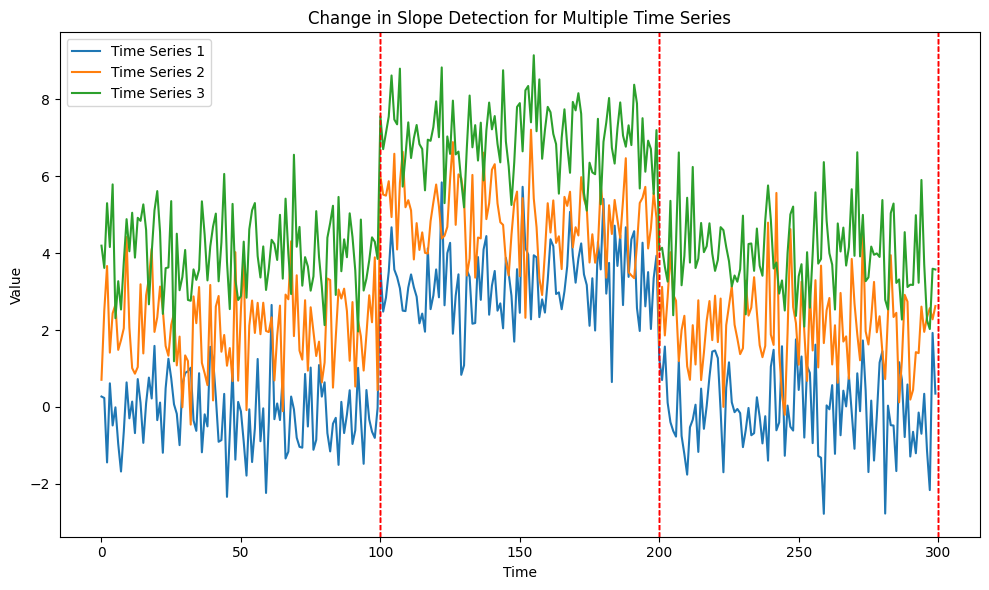

In [13]:
!pip install Ruptures
import numpy as np
import matplotlib.pyplot as plt
from ruptures.detection import Pelt

# Generate synthetic time series data with changes in slope
n_samples = 300
n_series = 3

data = [np.concatenate([np.random.normal(loc=i * 2, scale=1, size=100),
                        np.random.normal(loc=i * 2 + 3, scale=1, size=100),
                        np.random.normal(loc=i * 2, scale=1, size=100)]) for i in range(n_series)]

# Apply change point detection for each time series
models = [Pelt(model="l2").fit(series) for series in data]
results = [model.predict(pen=10) for model in models]

# Visualize the results
plt.figure(figsize=(10, 6))

for i, series in enumerate(data):
    plt.plot(series, label=f"Time Series {i + 1}")

    for bkpt in results[i]:
        plt.axvline(x=bkpt, color='red', linestyle='--', linewidth=1)

plt.title("Change in Slope Detection for Multiple Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()





